<a href="https://colab.research.google.com/github/lathamithu/The_Sparks_Foundation/blob/main/GRIP_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION USING UNSUPERVISED ML**

In [989]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_palette("husl",3)

In [990]:
# loading the dataset
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [991]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [992]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [993]:
data.shape

(150, 6)

In [994]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [995]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

***Data cleaning***

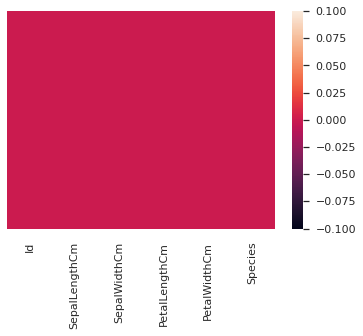

In [996]:
# checking for null entries
sns.heatmap(data.isnull(), yticklabels = False)

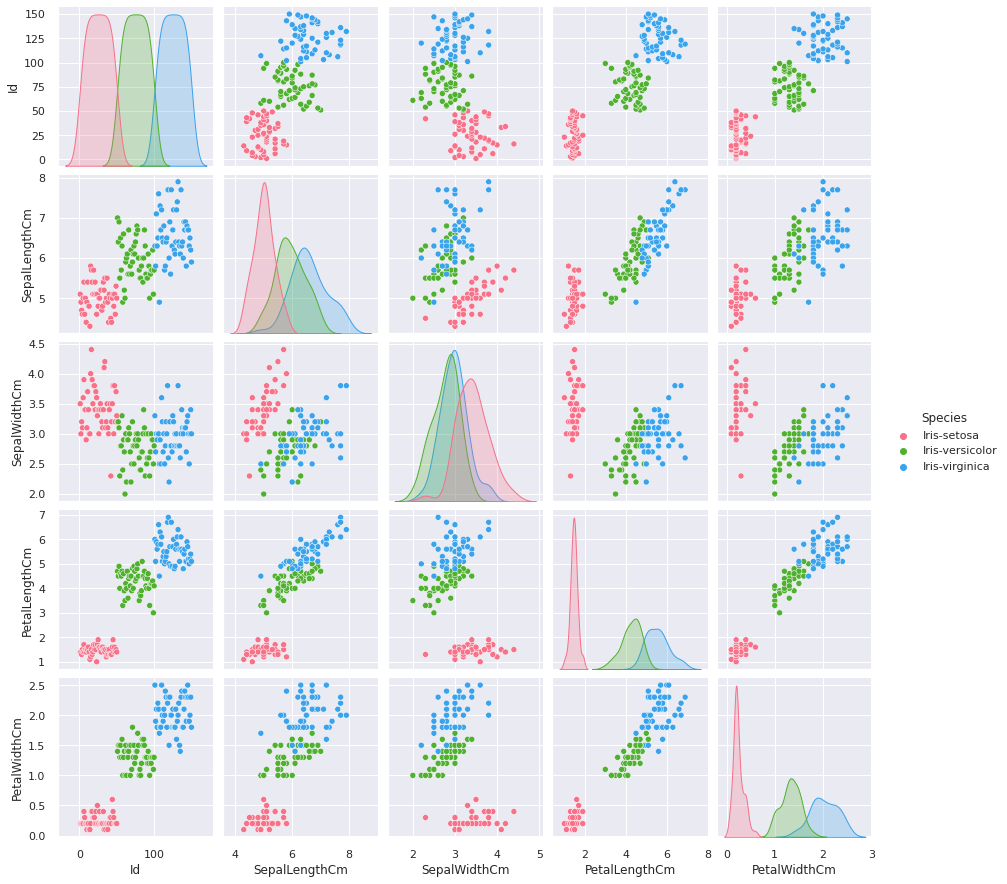

In [997]:
sns.pairplot(data, hue = 'Species')

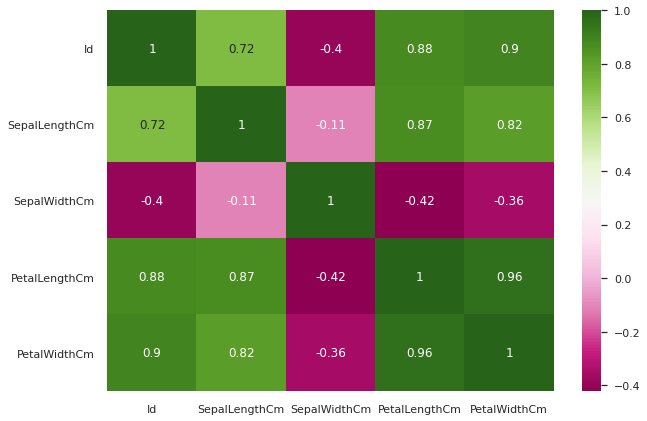

In [998]:
# finding the correlation between the variables
corr_matrix = data[data.columns].corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, cmap = 'PiYG', annot = True)

In [999]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [1000]:
data = data.drop("Id",axis=1)

In [1001]:
data.shape

(150, 5)

In [1002]:
data["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

***Data visualization***

In [1003]:
df = data

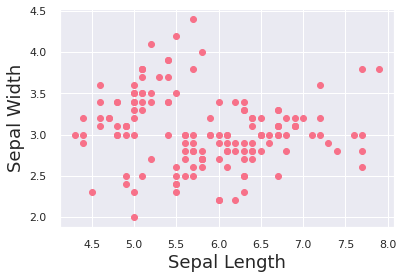

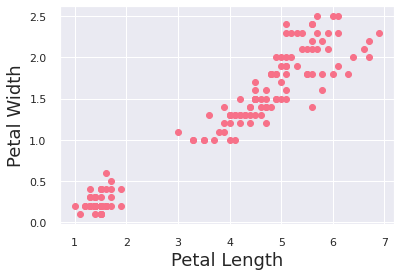

In [1004]:
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.show()
print()
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
plt.xlabel('Petal Length', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.show()

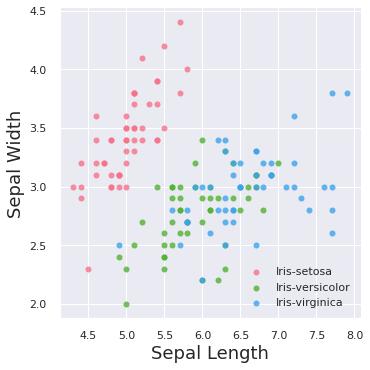

In [1005]:
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, fit_reg = False, hue = 'Species', legend=False)
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.legend(loc='lower right')

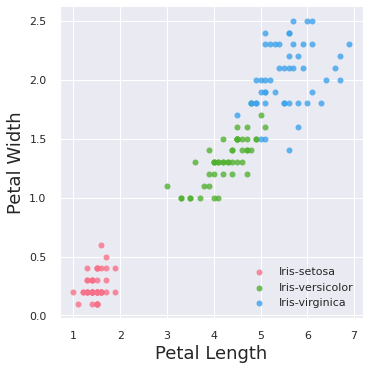

In [1006]:
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = data, fit_reg = False, hue = 'Species', legend=False)
plt.xlabel('Petal Length', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.legend(loc='lower right')

***Data preprocessing***

In [1007]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(data['Species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1008]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

***Splitting into train and test data***

In [1009]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = 1)

In [1010]:
x_train.shape

(105, 4)

In [1011]:
x_test.shape

(45, 4)

***Finding the optimum number of clusters***

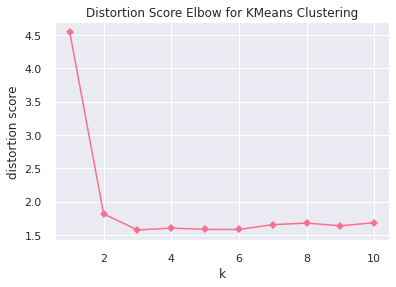

In [1012]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
km = KMeans()
e = KElbowVisualizer(km, k = (1,11), timings = False)
e.fit(x)
e.poof()

In [1013]:
km.inertia_

25.81466934046346

In [1014]:
x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

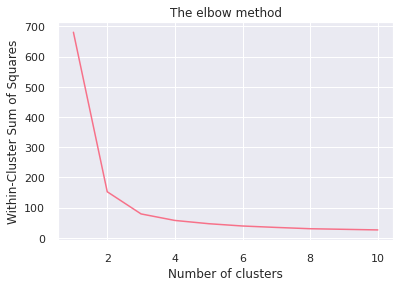

In [1015]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares') 
plt.show()

***Fitting the model***

In [1016]:
k = KMeans(n_clusters = 3, n_jobs = 4, random_state = 21)
k.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

***Centroids with respect to sepal***

In [1017]:
k.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [1018]:
c1 = {}
for i in range(3):
    sepal = []
    sepal.append(data.loc[y == i]['SepalLengthCm'].mean())
    sepal.append(data.loc[y == i]['SepalWidthCm'].mean())
    c1[i] = sepal

c1

{0: [5.005999999999999, 3.4180000000000006],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

In [1019]:
c11 = pd.DataFrame.from_dict(c1, orient ='index')
c11['Species'] = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
c11 = c11.rename(columns={0: 'A', 1: 'B'})
c11

,A,B,Species
0,5.006,3.418,Iris-setosa
1,5.936,2.770,Iris-versicolor
2,6.588,2.974,Iris-virginica


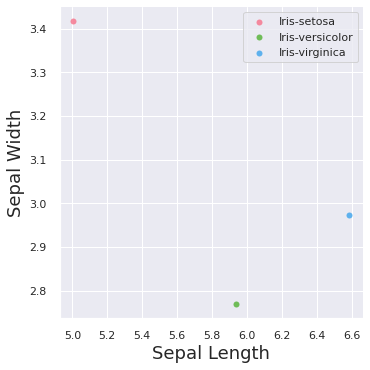

In [1020]:
sns.lmplot(x = 'A', y = 'B', data = c11, fit_reg = False, hue = 'Species', legend=False)
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.legend(loc='upper right', frameon = True)
plt.show()

*Updating by calculation of distance*

In [1021]:
# functions required for updation

def func1(data, c1):
    for i in range(3):
        data['Dist_{}'.format(i)] = (np.sqrt((data['SepalLengthCm'] - c1[i][0]) ** 2 + (data['SepalWidthCm'] - c1[i][1]) ** 2))
    cent = ['Dist_{}'.format(i) for i in c1.keys()]
    data['Closest'] = data.loc[:, cent].idxmin(axis = 1)
    data['Closest'] = data['Closest'].map(lambda x: int(x.lstrip('Dist_')))
    data['Colour'] = data['Closest'].map(lambda x: col[x])
    return data

def update(k):
    for i in range(3):
        c1[i][0] = np.mean(data[data['Closest'] == i]['SepalLengthCm'])
        c1[i][1] = np.mean(data[data['Closest'] == i]['SepalWidthCm'])
    return k

In [1022]:
data['Species'] = y
data = func1(data, c1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Dist_0,Dist_1,Dist_2,Closest,Colour
0,5.1,3.5,1.4,0.2,0,0.124740,1.109863,1.578233,0,y
1,4.9,3.0,1.4,0.2,0,0.431231,1.061224,1.688200,0,y
2,4.7,3.2,1.3,0.2,0,0.375713,1.308662,1.901478,0,y
3,4.6,3.1,1.5,0.2,0,0.515713,1.376153,1.991989,0,y
4,5.0,3.6,1.4,0.2,0,0.182099,1.250998,1.706933,0,y
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.744809,0.797870,0.114978,2,r
146,6.3,2.5,5.0,1.9,2,1.586556,0.453206,0.554635,1,g
147,6.5,3.0,5.2,2.0,2,1.551374,0.609094,0.091761,2,r
148,6.2,3.4,5.4,2.3,2,1.194136,0.683078,0.576212,2,r


<Figure size 360x360 with 0 Axes>

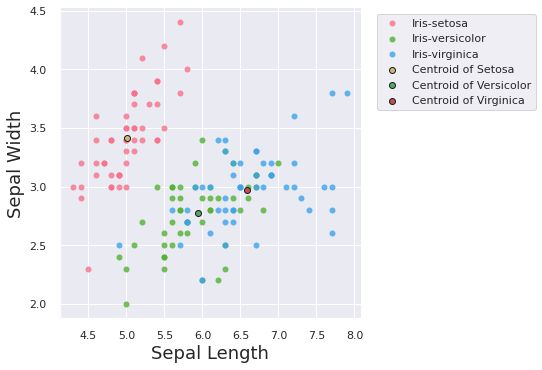

In [1023]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, fit_reg = False, hue = 'Species', legend=False)
for i in c1.keys():
    plt.scatter(*c1[i], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.show()

*Graphical visualization of updated centroids*

In [1024]:
c1 = update(c1)
c1

{0: [5.00943396226415, 3.373584905660378],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

<Figure size 360x360 with 0 Axes>

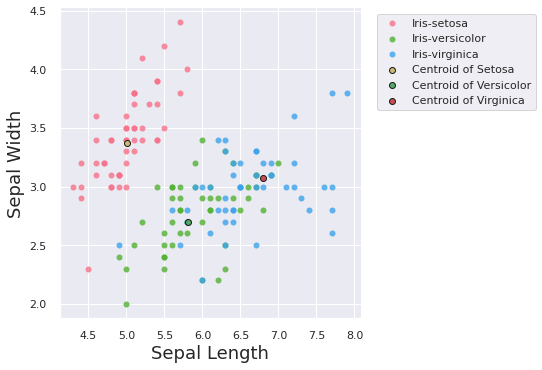

In [1025]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, fit_reg = False, hue = 'Species', legend=False)
for i in c1.keys():
    plt.scatter(*c1[i], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.show()

In [1026]:
data = func1(data, c1)

<Figure size 360x360 with 0 Axes>

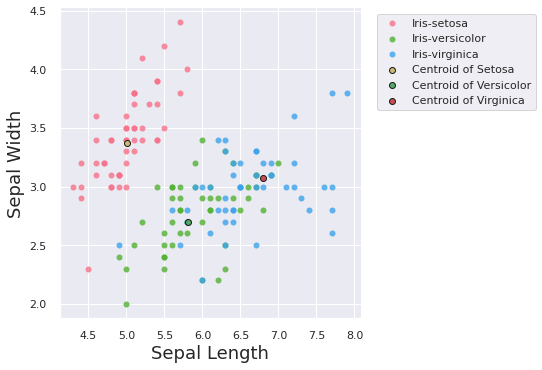

In [1027]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, fit_reg = False, hue = 'Species', legend=False)
for i in c1.keys():
    plt.scatter(c1[i][0],c1[i][1], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.show()

*Final clustering with respect to sepal*

In [1028]:
while True:
    close = data['Closest'].copy(deep = True)
    c1 = update(c1)
    data = func1(data, c1)
    if close.equals(data['Closest']):
        break

<Figure size 360x360 with 0 Axes>

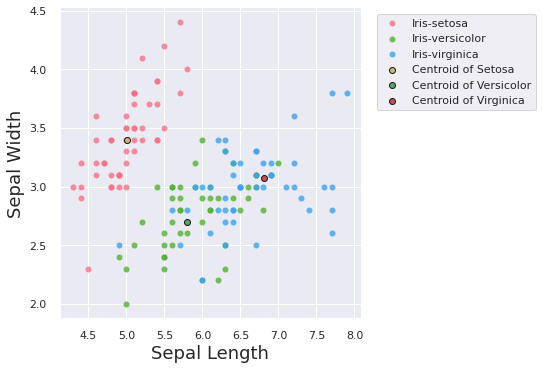

In [1029]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, fit_reg = False, hue = 'Species', legend=False)
for i in c1.keys():
    plt.scatter(c1[i][0],c1[i][1], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)
plt.show()

***Centroids with respect to petal***

In [1030]:
c2 = {}
for i in range(3):
    petal = []
    petal.append(df.loc[y == i]['PetalLengthCm'].mean())
    petal.append(df.loc[y == i]['PetalWidthCm'].mean())
    c2[i] = petal

c2

{0: [1.464, 0.2439999999999999],
 1: [4.26, 1.3259999999999998],
 2: [5.552, 2.026]}

In [1031]:
c22 = pd.DataFrame.from_dict(c2, orient ='index')
c22['Species'] = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
c22 = c22.rename(columns={0: 'A', 1: 'B'})
c22

,A,B,Species
0,1.464,0.244,Iris-setosa
1,4.260,1.326,Iris-versicolor
2,5.552,2.026,Iris-virginica


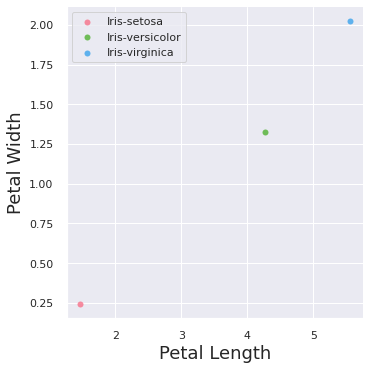

In [1032]:
sns.lmplot(x = 'A', y = 'B', data = c22, fit_reg = False, hue = 'Species', legend=False)
plt.xlabel('Petal Length', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.legend(loc='upper left', frameon = True)
plt.show()

*Updating by calculation of distance*

In [1033]:
# functions required for updation

def func2(data, c2):
    for i in range(3):
        data['Dist_{}'.format(i)] = (np.sqrt((data['PetalLengthCm'] - c2[i][0]) ** 2 + (data['PetalWidthCm'] - c2[i][1]) ** 2))
    cent = ['Dist_{}'.format(i) for i in c2.keys()]
    data['Closest'] = data.loc[:, cent].idxmin(axis = 1)
    data['Closest'] = data['Closest'].map(lambda x: int(x.lstrip('Dist_')))
    data['Colour'] = data['Closest'].map(lambda x: col[x])
    return data

def update2(k):
    for i in range(3):
        c2[i][0] = np.mean(df[df['Closest'] == i]['PetalLengthCm'])
        c2[i][1] = np.mean(df[df['Closest'] == i]['PetalWidthCm'])
    return k

In [1034]:
df = func2(df, c2)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Dist_0,Dist_1,Dist_2,Closest,Colour
0,5.1,3.5,1.4,0.2,0,0.077666,3.073675,4.535789,0,y
1,4.9,3.0,1.4,0.2,0,0.077666,3.073675,4.535789,0,y
2,4.7,3.2,1.3,0.2,0,0.169800,3.166935,4.627503,0,y
3,4.6,3.1,1.5,0.2,0,0.056851,2.980852,4.444432,0,y
4,5.0,3.6,1.4,0.2,0,0.077666,3.073675,4.535789,0,y
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,4.264368,1.353616,0.446072,2,r
146,6.3,2.5,5.0,1.9,2,3.904566,0.936523,0.566198,2,r
147,6.5,3.0,5.2,2.0,2,4.128103,1.156666,0.352959,2,r
148,6.2,3.4,5.4,2.3,2,4.440634,1.499425,0.313337,2,r


<Figure size 360x360 with 0 Axes>

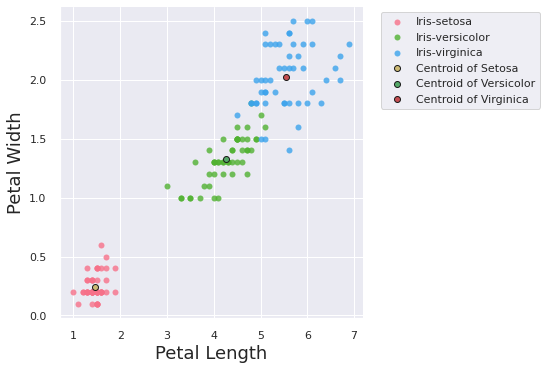

In [1035]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df, fit_reg = False, hue = 'Species', legend=False)
for i in c2.keys():
    plt.scatter(*c2[i], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Petal Length', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.show()

*Graphical visualization of updated centroids*

In [1036]:
c2 = update2(c2)
c2

{0: [1.464, 0.2439999999999999],
 1: [4.269230769230769, 1.342307692307692],
 2: [5.595833333333332, 2.0374999999999996]}

<Figure size 360x360 with 0 Axes>

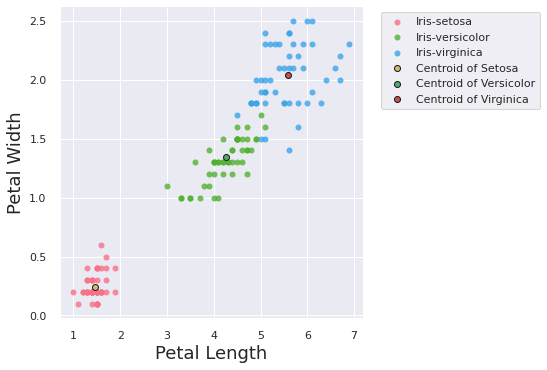

In [1037]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df, fit_reg = False, hue = 'Species', legend=False)
for i in c2.keys():
    plt.scatter(*c2[i], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Petal Length', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.show()

In [1038]:
df = func2(df, c2)

<Figure size 360x360 with 0 Axes>

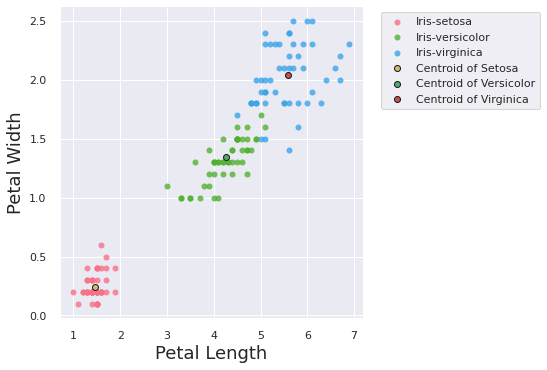

In [1039]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df, fit_reg = False, hue = 'Species', legend=False)
for i in c2.keys():
    plt.scatter(c2[i][0],c2[i][1], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Petal Length', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.show()

*Final clustering with respect to petal*

In [1040]:
while True:
    close = df['Closest'].copy(deep = True)
    c2 = update2(c2)
    df = func2(df, c2)
    if close.equals(df['Closest']):
        break

<Figure size 360x360 with 0 Axes>

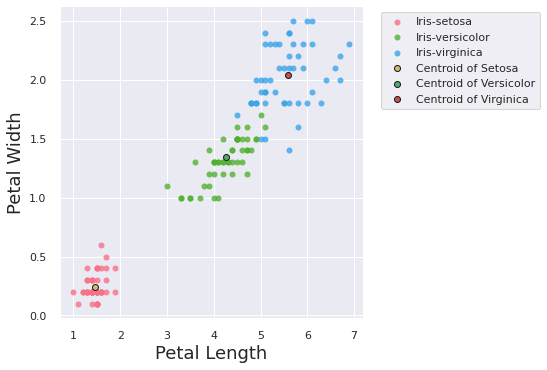

In [1041]:
fig = plt.figure(figsize = (5, 5))
sns.lmplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = df, fit_reg = False, hue = 'Species', legend=False)
for i in c2.keys():
    plt.scatter(c2[i][0],c2[i][1], color = col[i], edgecolor = 'k')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Centroid of Setosa', 'Centroid of Versicolor', 'Centroid of Virginica'], loc = 'upper right', frameon = True, bbox_to_anchor=(1.6, 1))
plt.xlabel('Petal Length', fontsize = 18)
plt.ylabel('Petal Width', fontsize = 18)
plt.show()